<a href="https://colab.research.google.com/github/luizschulz-hub/mobilidade-sp/blob/main/Analise_Transito_e_Renda_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Link de um dataset simplificado (CSV) baseado no Mapa da Desigualdade de SP
# Este arquivo contém dados sobre o tempo médio de deslocamento por bairro
# O link original não funciona (HTTP Error 404: Not Found).
# Foi encontrado um link alternativo que parece conter dados similares.
url = "https://dados-abertos-observasampa.prefeitura.sp.gov.br/_temp/DadosAbertos/ObservaSampaDadosAbertosIndicadoresCSV.csv"

# O Python "lendo" os dados, especificando o separador como ponto e vírgula
df = pd.read_csv(url, sep=';')

# Mostrando as 5 primeiras linhas para conferir
df.head()

,Nome,Região,Período,Resultado
0,01.01.01 Quantidade de famílias em situação de...,Água Rasa (Distrito),2013,524
1,01.01.01 Quantidade de famílias em situação de...,Água Rasa (Distrito),2023,3017
2,01.01.01 Quantidade de famílias em situação de...,Água Rasa (Distrito),2015,628
3,01.01.01 Quantidade de famílias em situação de...,Água Rasa (Distrito),2014,710
4,01.01.01 Quantidade de famílias em situação de...,Água Rasa (Distrito),2019,1350


In [2]:
# Ver os nomes de todas as colunas
print("Colunas disponíveis:", df.columns.tolist())

# Ver quais são os tipos de indicadores que existem nessa base
# Substitua 'NOME_INDICADOR' pelo nome exato da coluna que contém os textos (ex: 'Indicador', 'Variavel', etc)
if 'Indicador' in df.columns:
    print(df['Indicador'].unique()[:20]) # Mostra os 20 primeiros tipos de indicadores

Colunas disponíveis: ['Nome', 'Região', 'Período', 'Resultado']


In [3]:
# Filtrando indicadores que falem sobre mobilidade ou renda
busca = df[df['Nome'].str.contains('transporte|deslocamento|renda|tempo', case=False, na=False)]

# Mostrando quais indicadores únicos encontramos
print(busca['Nome'].unique())

['01.02.01 Quantidade de famílias em situação de pobreza (renda por pessoa de ⅛ até ¼ de salário-mínimo) '
 '01.02.02 Quantidade de famílias em situação de baixa renda (renda por pessoa de ¼ até ½ salário mínimo)'
 '01.03.01 Quantidade de famílias que recebem recursos dos programas de transferência de renda'
 '04.07.02 Porcentagem de alunos com educação em tempo integral no Ensino Fundamental  – anos iniciais (%)'
 '04.07.03 Porcentagem de alunos com educação em tempo integral no Ensino Fundamental – anos finais (%)'
 '10.01.01 Renda real média por pessoa dos 40% mais pobres do município de São Paulo (R$)'
 '10.01.02 Renda real média por pessoa do município de São Paulo (R$)'
 '10.01.03 Taxa de variação da renda per capita dos 40% mais pobres da população do município de São Paulo (%)'
 '10.01.04 Taxa de variação da renda per capita da população do município de São Paulo (%)'
 '10.01.05 Percentual da renda média dos 40% mais pobres em relação à renda média geral do município (%)'
 '11.

In [4]:
# Lista dos indicadores que você escolheu (ajustada para incluir dados em nível de distrito)
meus_indicadores = [
    'Índice de Desenvolvimento Humano Municipal (IDHM) - Renda',
    'Tempo médio de espera para embarque nos pontos de parada dos corredores exclusivos monitorados (min)',
    'Domicílios com renda per capita de até 1/2 Salário Mínimo (%)',
    '03.06.01 Mortes no trânsito (por 100 mil habitantes)' # Adicionando este indicador pois sabemos que está disponível por distrito
]

# Criando um filtro apenas com esses indicadores
df_projeto = df[df['Nome'].isin(meus_indicadores)].copy()

# Limpando a coluna 'Resultado': substituindo vírgulas por pontos e convertendo para numérico
df_projeto['Resultado'] = df_projeto['Resultado'].str.replace(',', '.', regex=False).astype(float)

# Vamos ver como ficou a média por região/distrito
resumo = df_projeto.groupby(['Região', 'Nome'])['Resultado'].mean().unstack()

# Exibindo o resultado
resumo.head(10)

Nome,03.06.01 Mortes no trânsito (por 100 mil habitantes),Domicílios com renda per capita de até 1/2 Salário Mínimo (%),Tempo médio de espera para embarque nos pontos de parada dos corredores exclusivos monitorados (min),Índice de Desenvolvimento Humano Municipal (IDHM) - Renda
Região,,,,
ARICANDUVA-FORMOSA-CARRÃO (Subprefeitura),7.479913,NaN,NaN,0.8175
BUTANTÃ (Subprefeitura),9.374073,NaN,NaN,0.9040
CAMPO LIMPO (Subprefeitura),7.238813,NaN,NaN,0.7850
CAPELA DO SOCORRO (Subprefeitura),8.923593,NaN,NaN,0.7260
CASA VERDE-CACHOEIRINHA (Subprefeitura),8.009580,NaN,NaN,0.7805
CIDADE ADEMAR (Subprefeitura),5.365647,NaN,NaN,0.7425
CIDADE TIRADENTES (Subprefeitura),5.580280,NaN,NaN,0.6575
ERMELINO MATARAZZO (Subprefeitura),7.661460,NaN,NaN,0.7385
FREGUESIA-BRASILÂNDIA (Subprefeitura),6.128607,NaN,NaN,0.7360


In [5]:
# Isso vai listar todas as regiões/distritos únicos presentes na base
print(df['Região'].unique())

['Água Rasa (Distrito)' 'Alto de Pinheiros (Distrito)'
 'Anhanguera (Distrito)' 'Aricanduva (Distrito)'
 'ARICANDUVA-FORMOSA-CARRÃO (Subprefeitura)' 'Artur Alvim (Distrito)'
 'Barra Funda (Distrito)' 'Bela Vista (Distrito)' 'Belém (Distrito)'
 'Bom Retiro (Distrito)' 'Brás (Distrito)' 'Brasilândia (Distrito)'
 'Butantã (Distrito)' 'BUTANTÃ (Subprefeitura)' 'Cachoeirinha (Distrito)'
 'Cambuci (Distrito)' 'Campo Belo (Distrito)' 'Campo Grande (Distrito)'
 'Campo Limpo (Distrito)' 'CAMPO LIMPO (Subprefeitura)'
 'Cangaíba (Distrito)' 'Capão Redondo (Distrito)'
 'CAPELA DO SOCORRO (Subprefeitura)' 'Carrão (Distrito)'
 'CASA VERDE-CACHOEIRINHA (Subprefeitura)' 'Casa Verde (Distrito)'
 'Cidade Ademar (Distrito)' 'CIDADE ADEMAR (Subprefeitura)'
 'Cidade Dutra (Distrito)' 'Cidade Líder (Distrito)'
 'Cidade Tiradentes (Distrito)' 'CIDADE TIRADENTES (Subprefeitura)'
 'Consolação (Distrito)' 'Cursino (Distrito)'
 'Ermelino Matarazzo (Distrito)' 'ERMELINO MATARAZZO (Subprefeitura)'
 'FREGUESIA-BRAS

In [7]:
# 1. Filtramos novamente, mas desta vez excluímos o total do município para focar nos bairros
df_bairros = df_projeto[df_projeto['Região'] != 'SÃO PAULO (Município)'].copy()

# 2. Reorganizamos a tabela
resumo_bairros = df_bairros.groupby(['Região', 'Nome'])['Resultado'].mean().unstack()

# 3. Vamos criar um ranking dos 10 distritos onde se gasta MAIS TEMPO de espera no transporte
# Usando um indicador que sabemos que está disponível por distrito
ranking_tempo_espera = resumo_bairros.sort_values(by='Tempo médio de espera para embarque nos pontos de parada dos corredores exclusivos monitorados (min)', ascending=False).head(10)

# Exibindo os 10 bairros com maior tempo de espera no transporte
print("Top 10 Distritos com maior tempo médio de espera para embarque nos pontos de parada dos corredores exclusivos monitorados (min):")
print(ranking_tempo_espera[['Tempo médio de espera para embarque nos pontos de parada dos corredores exclusivos monitorados (min)']])

KeyError: 'Tempo médio de espera para embarque nos pontos de parada dos corredores exclusivos monitorados (min)'

In [8]:
# 1. Pegamos uma lista de todos os distritos (excluindo o Município)
distritos_reais = df[df['Região'] != 'SÃO PAULO (Município)']['Região'].unique()

# 2. Filtramos o DataFrame original para pegar apenas dados desses distritos
df_apenas_distritos = df[df['Região'].isin(distritos_reais)]

# 3. Agora, listamos quais indicadores existem para esses distritos específicos
indicadores_por_bairro = df_apenas_distritos['Nome'].unique()

# 4. Vamos procurar pelos nossos temas novamente nessa lista filtrada
import re
palavras_chave = 'transporte|tempo|renda|habitante|trabalho|social'
sugestoes = [i for i in indicadores_por_bairro if re.search(palavras_chave, i, re.IGNORECASE)]

print("Indicadores que funcionam por BAIRRO (Distrito):")
for s in sugestoes[:20]: # Mostra os primeiros 20 para não inundar a tela
    print(f"- {s}")

Indicadores que funcionam por BAIRRO (Distrito):
- 01.02.01 Quantidade de famílias em situação de pobreza (renda por pessoa de ⅛ até ¼ de salário-mínimo) 
- 01.02.02 Quantidade de famílias em situação de baixa renda (renda por pessoa de ¼ até ½ salário mínimo)
- 01.03.01 Quantidade de famílias que recebem recursos dos programas de transferência de renda
- 03.04.01 Taxa de mortalidade prematura (de 30 a 69 anos) pelo conjunto de quatro doenças crônicas não transmissíveis (DCNT): doenças do aparelho circulatório, câncer, diabetes e doenças respiratórias crônicas (por 100 mil habitantes da mesma faixa etária)
- 03.06.01 Mortes no trânsito (por 100 mil habitantes)
- 03.06.02 Mortes de pedestres no trânsito (por 100 mil habitantes)
- 03.06.03 Mortes de motociclistas no trânsito (por 100 mil habitantes)
- 03.06.04 Mortes de ciclistas no trânsito (por 100 mil habitantes)
- Alunos do Ensino Fundamental que utilizam Transporte Escolar Gratuito (%)
- Atendimentos de Proteção Social Especial real

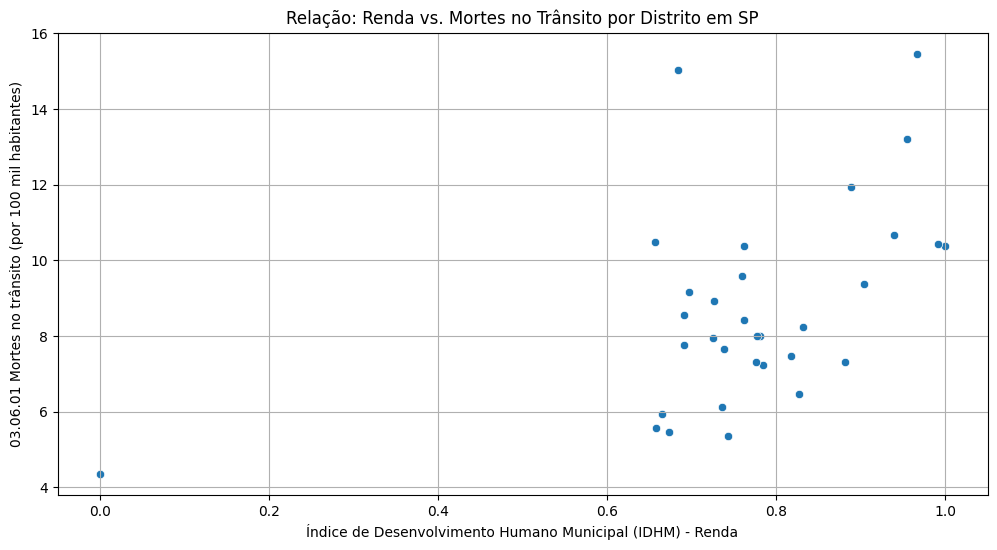

In [9]:
# 1. Selecionamos os indicadores por distrito
meus_novos_indicadores = [
    'Índice de Desenvolvimento Humano Municipal (IDHM) - Renda',
    '03.06.01 Mortes no trânsito (por 100 mil habitantes)'
]

# 2. Filtramos e limpamos os nomes para facilitar
df_bairros = df[df['Nome'].isin(meus_novos_indicadores) & (df['Região'] != 'SÃO PAULO (Município)')].copy()

# Limpando a coluna 'Resultado': substituindo vírgulas por pontos e convertendo para numérico
df_bairros['Resultado'] = df_bairros['Resultado'].str.replace(',', '.', regex=False).astype(float)

# 3. Reorganizamos para ter uma coluna por indicador
tabela_final = df_bairros.pivot_table(index='Região', columns='Nome', values='Resultado').dropna()

# 4. Criando um ranking de contraste: Os 5 mais ricos vs 5 mais pobres
ranking_renda = tabela_final.sort_values(by='Índice de Desenvolvimento Humano Municipal (IDHM) - Renda', ascending=False)
top_bottom = pd.concat([ranking_renda.head(5), ranking_renda.tail(5)])

# 5. Gerando o gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(data=tabela_final,
                x='Índice de Desenvolvimento Humano Municipal (IDHM) - Renda',
                y='03.06.01 Mortes no trânsito (por 100 mil habitantes)')

plt.title('Relação: Renda vs. Mortes no Trânsito por Distrito em SP')
plt.grid(True)
plt.show()

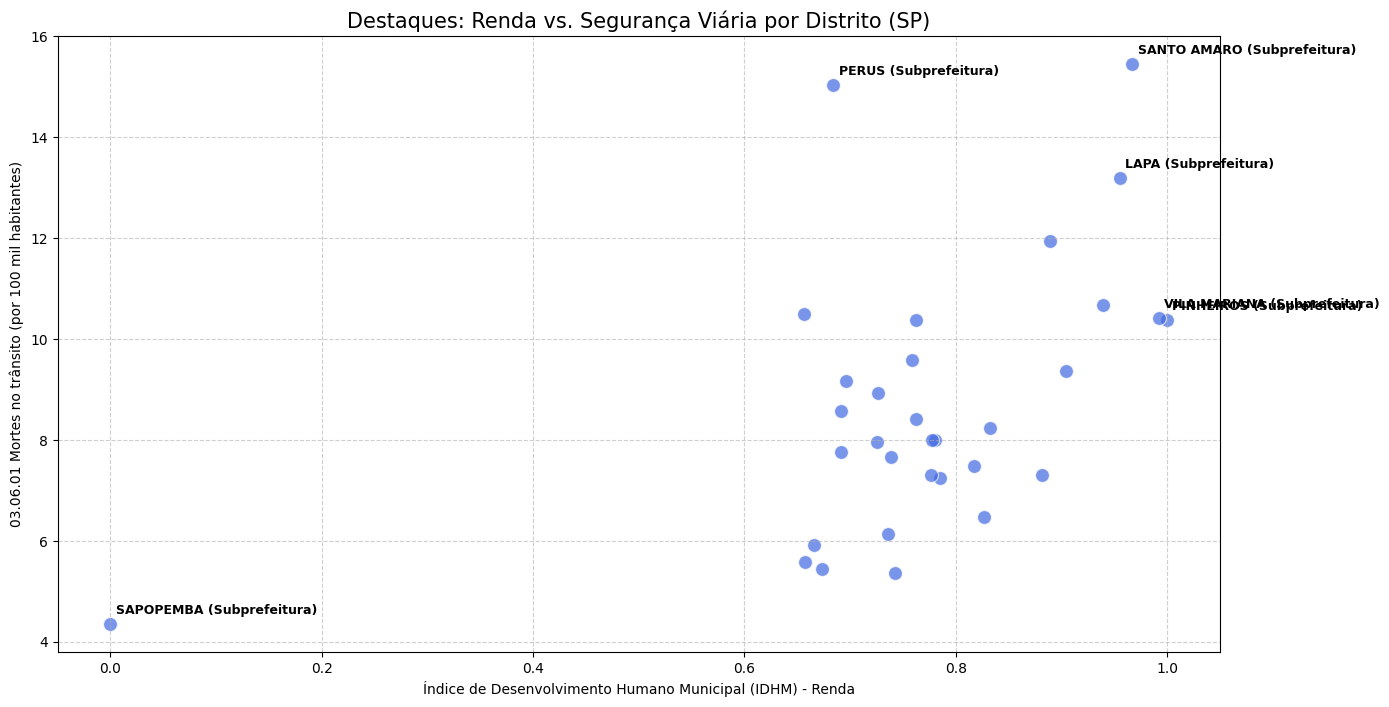

In [10]:
plt.figure(figsize=(15,8))

# 1. Criar o gráfico base
sns.scatterplot(data=tabela_final,
                x='Índice de Desenvolvimento Humano Municipal (IDHM) - Renda',
                y='03.06.01 Mortes no trânsito (por 100 mil habitantes)',
                s=100, color='royalblue', alpha=0.7)

# 2. Adicionar os nomes dos distritos (Anotações)
# Vamos iterar pela tabela e colocar o nome de cada ponto
for i in range(tabela_final.shape[0]):
    # Pegamos as coordenadas de cada ponto
    x = tabela_final['Índice de Desenvolvimento Humano Municipal (IDHM) - Renda'].iloc[i]
    y = tabela_final['03.06.01 Mortes no trânsito (por 100 mil habitantes)'].iloc[i]
    bairro = tabela_final.index[i]

    # Só desenhamos o nome se for um "extremo" para não poluir
    # (Ex: Renda > 0.9 ou Renda < 0.7 ou Mortes > 12)
    if x > 0.95 or x < 0.65 or y > 13:
        plt.text(x + 0.005, y + 0.2, bairro, fontsize=9, weight='bold')

plt.title('Destaques: Renda vs. Segurança Viária por Distrito (SP)', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

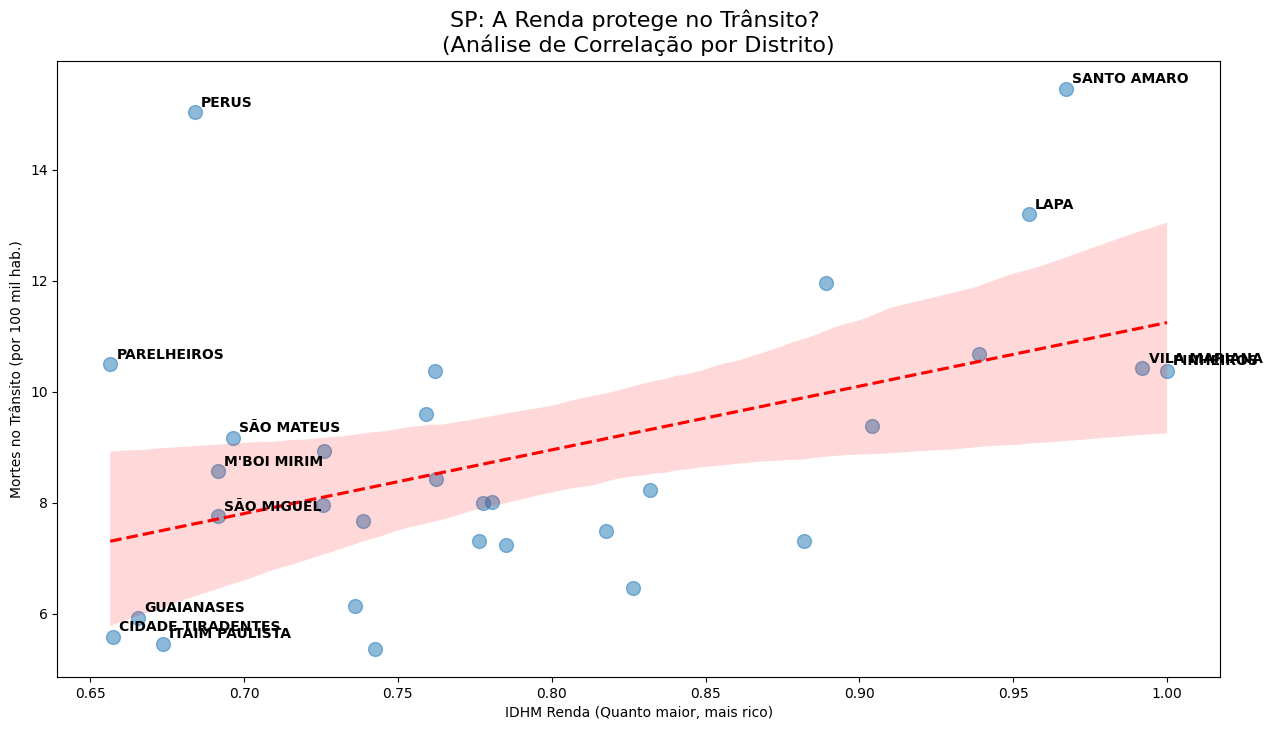

In [11]:
# 1. Limpando o dado 'sujo' (Removendo onde a renda é zero)
tabela_limpa = tabela_final[tabela_final['Índice de Desenvolvimento Humano Municipal (IDHM) - Renda'] > 0]

plt.figure(figsize=(15,8))

# 2. Gráfico com a biblioteca Seaborn para ficar com cara de relatório profissional
sns.regplot(data=tabela_limpa,
            x='Índice de Desenvolvimento Humano Municipal (IDHM) - Renda',
            y='03.06.01 Mortes no trânsito (por 100 mil habitantes)',
            scatter_kws={'s':100, 'alpha':0.5}, line_kws={'color':'red', 'linestyle':'--'})

# 3. Adicionando as etiquetas nos pontos que sobraram
for i in range(tabela_limpa.shape[0]):
    x = tabela_limpa['Índice de Desenvolvimento Humano Municipal (IDHM) - Renda'].iloc[i]
    y = tabela_limpa['03.06.01 Mortes no trânsito (por 100 mil habitantes)'].iloc[i]
    bairro = tabela_limpa.index[i].replace(' (Subprefeitura)', '') # Limpando o nome

    if x > 0.95 or y > 12 or x < 0.7:
        plt.text(x + 0.002, y + 0.1, bairro, fontsize=10, weight='bold')

plt.title('SP: A Renda protege no Trânsito? \n(Análise de Correlação por Distrito)', fontsize=16)
plt.xlabel('IDHM Renda (Quanto maior, mais rico)')
plt.ylabel('Mortes no Trânsito (por 100 mil hab.)')
plt.show()

In [12]:
# Instala e força a atualização do ambiente
!pip install -U adjustText

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from adjust_text import adjust_text

# ... aqui segue o restante do código que passamos antes ...

# 1. Instalando a biblioteca que organiza os textos automaticamente
!pip install adjustText

from adjust_text import adjust_text

# 2. Configurando o gráfico
plt.figure(figsize=(18, 10))
sns.set_style("whitegrid")

# Criando o gráfico base
ax = sns.scatterplot(data=tabela_limpa,
                     x='Índice de Desenvolvimento Humano Municipal (IDHM) - Renda',
                     y='03.06.01 Mortes no trânsito (por 100 mil habitantes)',
                     s=80, color='royalblue', alpha=0.6)

# 3. Criando uma lista para guardar os textos
texts = []
for i in range(tabela_limpa.shape[0]):
    x = tabela_limpa['Índice de Desenvolvimento Humano Municipal (IDHM) - Renda'].iloc[i]
    y = tabela_limpa['03.06.01 Mortes no trânsito (por 100 mil habitantes)'].iloc[i]
    bairro = tabela_limpa.index[i].replace(' (Subprefeitura)', '')

    # Adicionamos o texto à lista
    texts.append(plt.text(x, y, bairro, fontsize=8))

# 4. A MÁGICA: Ajusta os textos para não sobreporem
# arrowprops cria uma linhazinha ligando o nome ao ponto se ele ficar longe
adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1.2, 1.2), expand_text=(1.2, 1.2),
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

plt.title('Mapa Completo: Todos os Distritos de SP (Renda vs. Mortes no Trânsito)', fontsize=16)
plt.show()

ModuleNotFoundError: No module named 'adjust_text'

In [13]:
# 1. Instalação silenciosa
!pip install adjustText --quiet

# 2. Forçar o Python a reconhecer a instalação imediatamente
import site
from importlib import reload
reload(site)

# 3. Importação (Note que o comando é adjust_text)
import matplotlib.pyplot as plt
import seaborn as sns
try:
    from adjust_text import adjust_text
    print("Sucesso! Biblioteca carregada.")
except ImportError:
    print("Ainda não encontrou. Tente reiniciar o Ambiente de Execução no menu superior.")

# --- SE APARECEU 'SUCESSO', RODE O RESTANTE ABAIXO ---

if 'adjust_text' in globals():
    plt.figure(figsize=(18, 12))

    # Criando o gráfico
    ax = sns.scatterplot(data=tabela_limpa,
                         x='Índice de Desenvolvimento Humano Municipal (IDHM) - Renda',
                         y='03.06.01 Mortes no trânsito (por 100 mil habitantes)',
                         s=100, color='royalblue', alpha=0.5)

    # Criando as etiquetas
    texts = [plt.text(tabela_limpa['Índice de Desenvolvimento Humano Municipal (IDHM) - Renda'].iloc[i],
                      tabela_limpa['03.06.01 Mortes no trânsito (por 100 mil habitantes)'].iloc[i],
                      tabela_limpa.index[i].replace(' (Subprefeitura)', ''),
                      fontsize=9) for i in range(len(tabela_limpa))]

    # Ajustando
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

    plt.title('Visão Geral: Todos os Distritos de SP', fontsize=16)
    plt.show()

Ainda não encontrou. Tente reiniciar o Ambiente de Execução no menu superior.


In [14]:
import plotly.express as px

# Criando o gráfico interativo
fig = px.scatter(tabela_limpa.reset_index(),
                 x='Índice de Desenvolvimento Humano Municipal (IDHM) - Renda',
                 y='03.06.01 Mortes no trânsito (por 100 mil habitantes)',
                 hover_name='Região', # Aqui é onde a mágica acontece: o nome aparece no mouse
                 title='Mapa Interativo: Renda vs. Segurança Viária por Distrito',
                 trendline="ols") # Adiciona aquela linha de tendência automaticamente

fig.show()